 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_csv=Path('../Starter_code/Resources/whale_returns.csv')
whale_returns_df=pd.read_csv(whale_returns_csv)
whale_returns_df['Date']=pd.to_datetime(whale_returns_df['Date'],dayfirst=True)
whale_returns_df.set_index(whale_returns_df['Date'],inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().mean()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_retruns_df=whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algorithmic_returns_csv=Path('../Starter_code/Resources/algo_returns.csv')
algorithmic_returns_df=pd.read_csv(algorithmic_returns_csv)
algorithmic_returns_df['Date']=pd.to_datetime(algorithmic_returns_df['Date'],dayfirst=True)
algorithmic_returns_df.set_index(algorithmic_returns_df['Date'],inplace=True)
algorithmic_returns_df.drop(columns=['Date'],inplace=True)
algorithmic_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algorithmic_returns_df.isnull().mean()
algorithmic_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algorithmic_returns_df=algorithmic_returns_df.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv=Path('../Starter_code/Resources/sp_tsx_history.csv')
sp_tsx_history_df=pd.read_csv(sp_tsx_history_csv)
sp_tsx_history_df['Date']=pd.to_datetime(sp_tsx_history_df['Date'],dayfirst=True)
sp_tsx_history_df.set_index(sp_tsx_history_df['Date'],inplace=True)
sp_tsx_history_df.drop(columns=['Date'],inplace=True)
sp_tsx_history_df['Close']=sp_tsx_history_df['Close'].str.replace('$','')
sp_tsx_history_df['Close']
sp_tsx_history_df=sp_tsx_history_df.sort_values('Date',ascending=True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"


In [9]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace(',','').astype('float')
sp_tsx_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp_tsx_history_df.isnull().sum()
sp_tsx_returns_df=sp_tsx_history_df.pct_change()
sp_tsx_returns_df.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_returns_df.pct_change()
sp_tsx_returns_df.dropna(inplace=True)
sp_tsx_returns_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
columns=["S&P TSX 60"]
sp_tsx_returns_df.columns=columns
sp_tsx_returns_df.head()


,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_df=pd.concat([whale_returns_df,algorithmic_returns_df,sp_tsx_returns_df],axis="columns",join="inner")
all_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

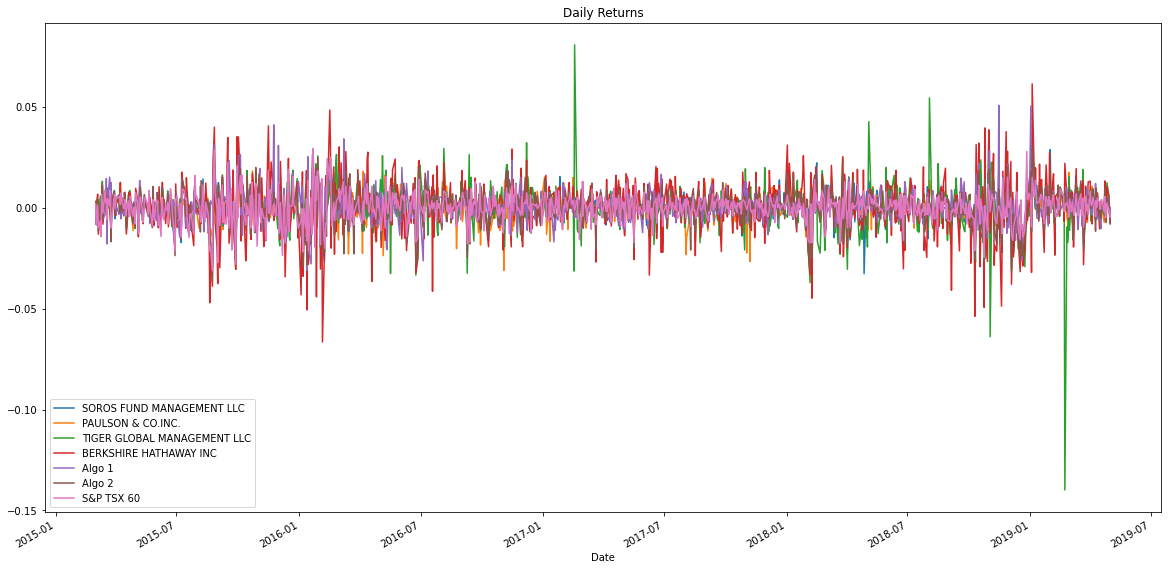

In [15]:
# Plot daily returns of all portfolios
all_returns_df.plot(title='Daily Returns',figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [16]:
# Calculate cumulative returns of all portfolios
all_returns_df_cumulative_returns=((1+all_returns_df).cumprod())-1
all_returns_df_cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.010084,0.002247,-0.006596
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.018586,0.004669,-0.009945
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.019524,0.009012,-0.008614
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.024384,-0.002551,-0.018500


<AxesSubplot:xlabel='Date'>

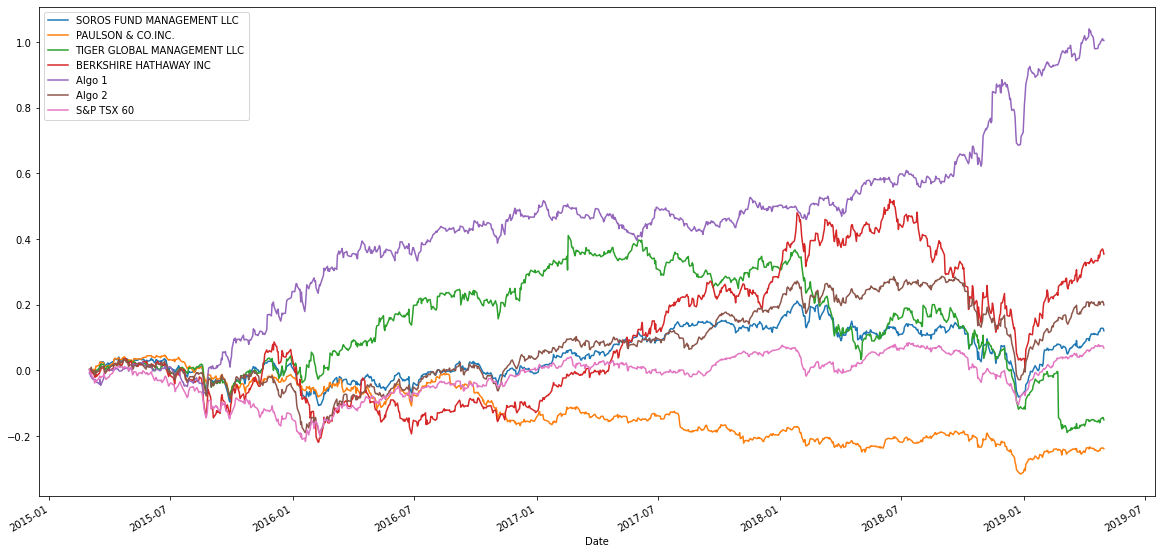

In [17]:
# Plot cumulative returns
all_returns_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Risk'}>

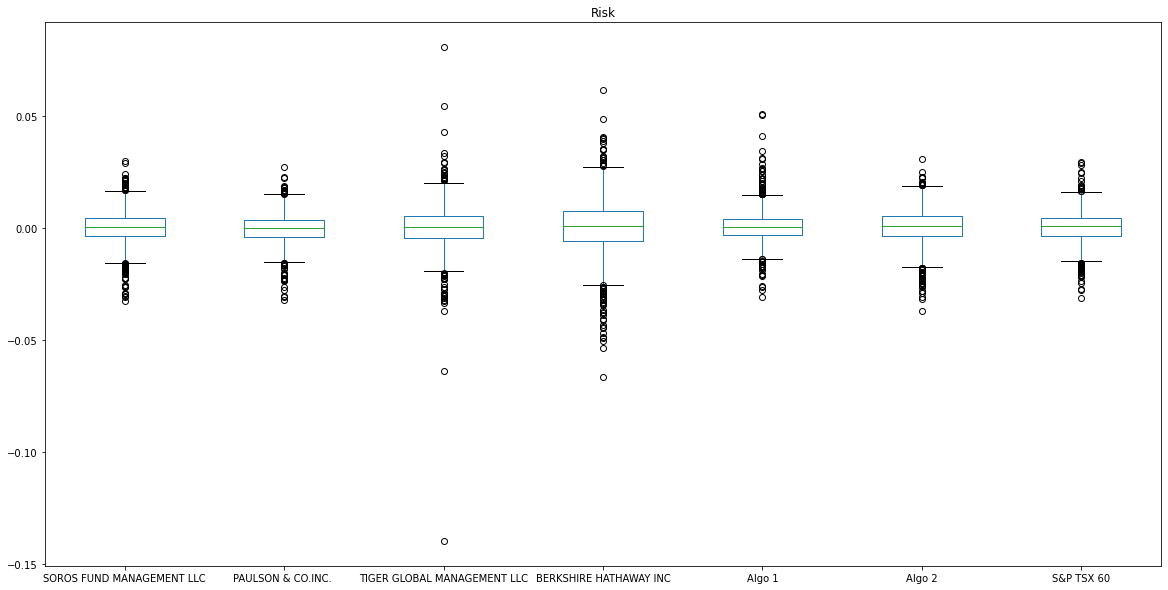

In [18]:
# Box plot to visually show risk
all_returns_df.plot.box(title='Risk',figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std=all_returns_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008323
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007590
S&P TSX 60                     0.007031
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_daily_std=sp_tsx_returns_df.std()
sp_daily_std

# Determine which portfolios are riskier than the S&P TSX 60
risk_port=(daily_std>sp_daily_std['S&P TSX 60'])
risk_port.head()

BERKSHIRE HATHAWAY INC         True
TIGER GLOBAL MANAGEMENT LLC    True
Algo 2                         True
SOROS FUND MANAGEMENT LLC      True
Algo 1                         True
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std=daily_std*np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132121
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120491
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns_df.rolling(window=21).std()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

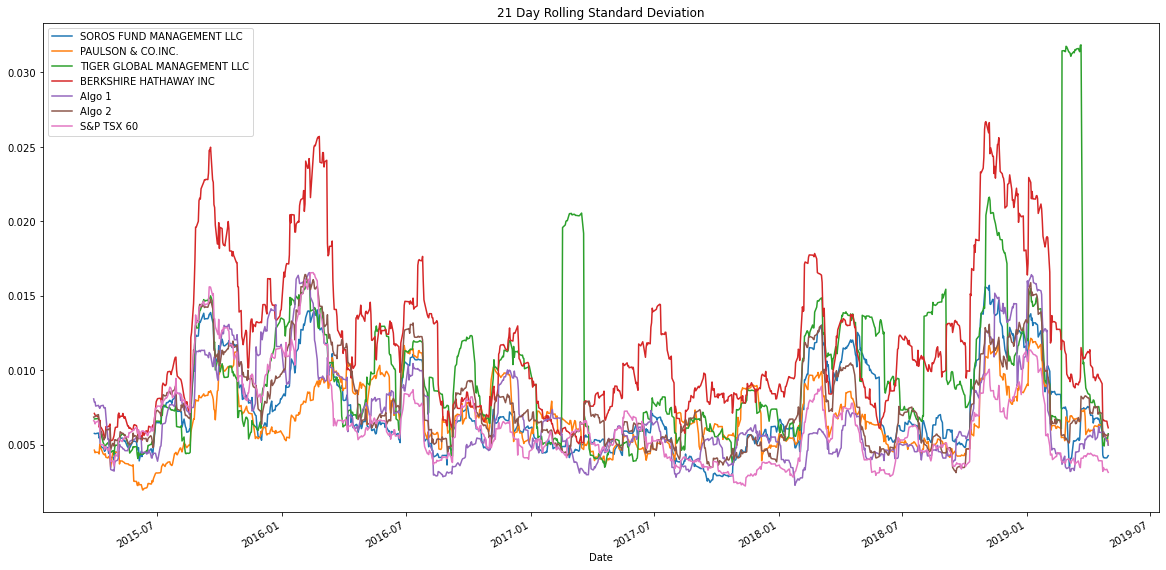

In [23]:
# Plot the rolling standard deviation
all_returns_df.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation',figsize=(20,10))

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation=all_returns_df.corr()
correlation



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.284840,0.309759
Algo 2,0.826667,0.674015,0.506689,0.684609,0.284840,1.000000,0.737391
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.309759,0.737391,1.000000


<AxesSubplot:>

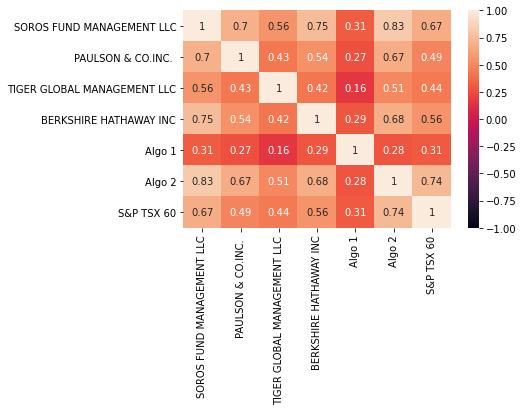

In [25]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [26]:
# Calculate covariance of a single portfolio
algo_cov=all_returns_df['Algo 1'].rolling(window=60).cov(all_returns_df['S&P TSX 60'])
algo_cov


Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.000002
2019-04-26    0.000002
2019-04-29    0.000002
2019-04-30    0.000002
2019-05-01    0.000002
Length: 1030, dtype: float64

In [27]:
# Calculate variance of S&P TSX
algo_var=all_returns_df['S&P TSX 60'].rolling(window=60).var()
algo_var

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX 60, Length: 1030, dtype: float64

In [28]:
# Computing beta
beta=algo_cov/algo_var
beta

Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-25    0.143726
2019-04-26    0.145294
2019-04-29    0.141913
2019-04-30    0.160629
2019-05-01    0.118788
Length: 1030, dtype: float64

<AxesSubplot:title={'center':'Algorithm 1 Beta'}, xlabel='Date'>

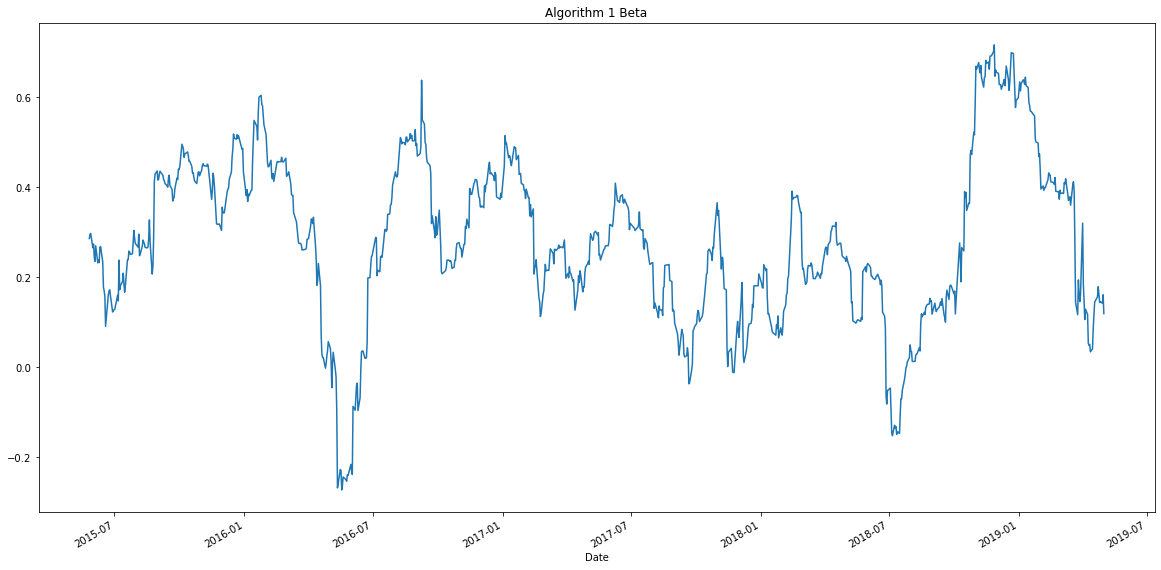

In [29]:
# Plot beta trend

beta.plot(title='Algorithm 1 Beta',figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [30]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma=all_returns_df.ewm(halflife=21, adjust=True).std()
rolling_window_ewma

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,0.004395,0.002934,0.007411
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.003724,0.002197,0.005197
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004036,0.002271,0.004843
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003466,0.006589,0.005495
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratio=(
    all_returns_df.mean()*252/(all_returns_df.std()*np.sqrt(252))
)
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
Algo 2                         0.402526
S&P TSX 60                     0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

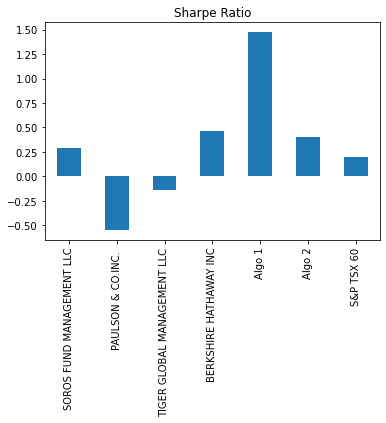

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',title='Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [33]:
# Reading data from 1st stock
tesla_csv=Path('../Starter_Code/Resources/TESLA.csv')
tesla_df=pd.read_csv(tesla_csv,index_col='Date',parse_dates=True,infer_datetime_format=True)
tesla_df.head()

,Close
Date,
2015-01-02,43.86
2015-01-05,42.02
2015-01-06,42.26
2015-01-07,42.19
2015-01-08,42.12


In [34]:
# Reading data from 2nd stock
disney_csv=Path('../Starter_Code/Resources/DISNEY.csv')
disney_df=pd.read_csv(disney_csv,index_col='Date',parse_dates=True,infer_datetime_format=True)
disney_df.head()

,Close
Date,
2015-01-02,93.75
2015-01-05,92.38
2015-01-06,91.89
2015-01-07,92.83
2015-01-08,93.79


In [35]:
# Reading data from 3rd stock
google_csv=Path('../Starter_Code/Resources/GOOGLE.csv')
google_df=pd.read_csv(google_csv,index_col='Date',parse_dates=True,infer_datetime_format=True)
google_df.head()

,Close
Date,
2015-01-02,523.37
2015-01-05,512.46
2015-01-06,500.59
2015-01-07,499.73
2015-01-08,501.30


In [36]:
# Reading data from 4th stock 
netflix_csv=Path('../Starter_Code/Resources/netflix.csv')
netflix_df=pd.read_csv(netflix_csv,index_col='Date',parse_dates=True,infer_datetime_format=True)
netflix_df.head()

,Close
Date,
2015-01-02,49.85
2015-01-05,47.31
2015-01-06,46.50
2015-01-07,46.74
2015-01-08,47.78


In [37]:
# Reading data from 5th stock
pif_csv=Path('../Starter_Code/Resources/PIF.csv')
pif_df=pd.read_csv(pif_csv,index_col='Date',parse_dates=True,infer_datetime_format=True)
pif_df.head()

,Close
Date,
2015-01-02,20.0
2015-01-05,20.0
2015-01-06,20.0
2015-01-07,10.0
2015-01-08,10.0


In [38]:
# Combine all stocks in a single DataFrame
combined_stocks_df=pd.concat([tesla_df,disney_df,google_df,netflix_df,pif_df],axis='columns',join='inner')
combined_stocks_df.head()

,Close,Close,Close,Close,Close
Date,,,,,
2015-01-02,43.86,93.75,523.37,49.85,20.0
2015-01-05,42.02,92.38,512.46,47.31,20.0
2015-01-06,42.26,91.89,500.59,46.50,20.0
2015-01-07,42.19,92.83,499.73,46.74,10.0
2015-01-08,42.12,93.79,501.30,47.78,10.0


In [39]:
# Reset Date index
combined_stocks_df.sort_index(inplace=True)
combined_stocks_df.head()

,Close,Close,Close,Close,Close
Date,,,,,
2015-01-02,43.86,93.75,523.37,49.85,20.0
2015-01-05,42.02,92.38,512.46,47.31,20.0
2015-01-06,42.26,91.89,500.59,46.50,20.0
2015-01-07,42.19,92.83,499.73,46.74,10.0
2015-01-08,42.12,93.79,501.30,47.78,10.0


In [40]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_df.columns=['Tesla','Disney','Google','Netflix','Pif']
combined_stocks_df.head()

,Tesla,Disney,Google,Netflix,Pif
Date,,,,,
2015-01-02,43.86,93.75,523.37,49.85,20.0
2015-01-05,42.02,92.38,512.46,47.31,20.0
2015-01-06,42.26,91.89,500.59,46.50,20.0
2015-01-07,42.19,92.83,499.73,46.74,10.0
2015-01-08,42.12,93.79,501.30,47.78,10.0


In [41]:
# Calculate daily returns
daily_returns=combined_stocks_df.pct_change()
#daily_returns.isnull().sum()
#daily_returns
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,Tesla,Disney,Google,Netflix,Pif
Date,,,,,
2015-01-05,-0.041952,-0.014613,-0.020846,-0.050953,0.0
2015-01-06,0.005712,-0.005304,-0.023163,-0.017121,0.0
2015-01-07,-0.001656,0.010230,-0.001718,0.005161,-0.5
2015-01-08,-0.001659,0.010341,0.003142,0.022251,0.0
2015-01-09,-0.018756,0.004905,-0.012946,-0.015488,0.0


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/5, 1/5, 1/5,1/5,1/5]
# Calculate portfolio return
weighted_portfolio_returns=daily_returns.dot(weights)

# Display sample data
weighted_portfolio_returns=weighted_portfolio_returns.rename('Freedom')
weighted_portfolio_returns.head()

Date
2015-01-05   -0.025673
2015-01-06   -0.007975
2015-01-07   -0.097597
2015-01-08    0.006815
2015-01-09   -0.008457
Name: Freedom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
#final_return_df=pd.concat([whale_returns_df,algorithmic_returns_df,sp_tsx_returns_df,weighted_portfolio_returns],axis='columns',join='inner')
all_returns_df['Freedom'] = weighted_portfolio_returns
final_return_df=all_returns_df

final_return_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Freedom
Date,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950,0.004484
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.001599
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.000748
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.003013
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.017496


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#all_returns_df.pct_change().sum()
final_return_df=final_return_df.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
final_returns_std=final_return_df.std()*np.sqrt(252)
final_returns_std

SOROS FUND MANAGEMENT LLC      0.128686
PAULSON & CO.INC.              0.098047
TIGER GLOBAL MANAGEMENT LLC    0.137146
BERKSHIRE HATHAWAY INC         0.210463
Algo 1                         0.144174
Algo 2                         0.142451
S&P TSX 60                     0.147966
Freedom                        0.735703
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-day Window'}, xlabel='Date'>

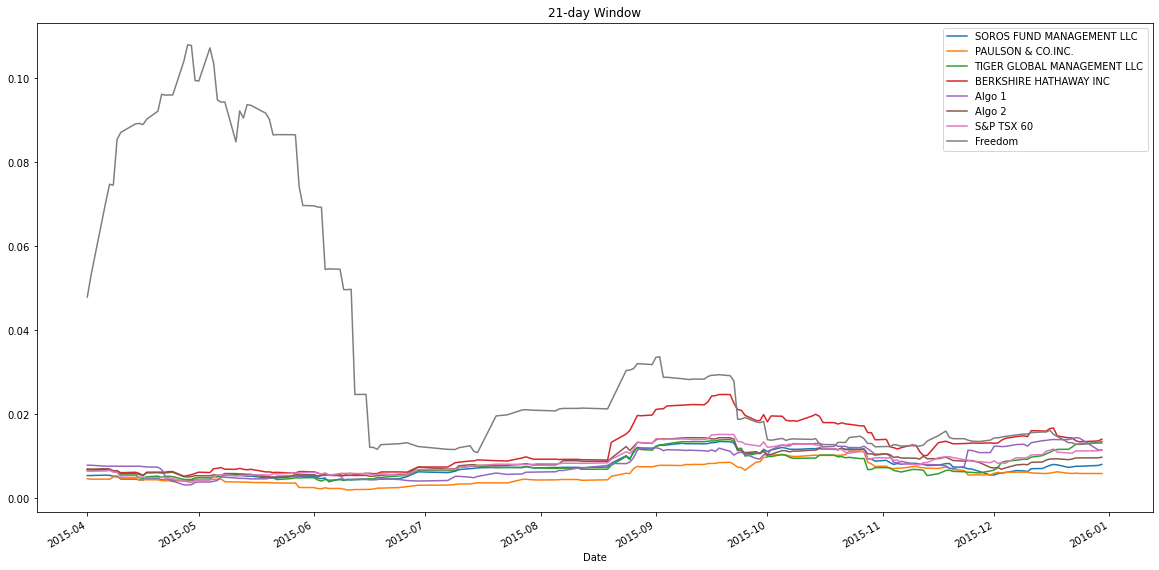

In [51]:
# Calculate rolling standard deviation
std_final=final_return_df.rolling(window=21).std()
# Plot rolling standard deviation
std_final.plot(title='21-day Window',figsize=(20,10))

### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation
correlation=final_return_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Freedom
SOROS FUND MANAGEMENT LLC,1.000000,0.814524,0.842022,0.788330,0.446201,0.872540,0.782109,0.207332
PAULSON & CO.INC.,0.814524,1.000000,0.734573,0.688177,0.369966,0.716920,0.590226,0.127689
TIGER GLOBAL MANAGEMENT LLC,0.842022,0.734573,1.000000,0.707708,0.326956,0.814738,0.715553,0.181969
BERKSHIRE HATHAWAY INC,0.788330,0.688177,0.707708,1.000000,0.386233,0.714816,0.671021,0.185332
Algo 1,0.446201,0.369966,0.326956,0.386233,1.000000,0.355018,0.420168,0.005767
Algo 2,0.872540,0.716920,0.814738,0.714816,0.355018,1.000000,0.779647,0.182452
S&P TSX 60,0.782109,0.590226,0.715553,0.671021,0.420168,0.779647,1.000000,0.191468
Freedom,0.207332,0.127689,0.181969,0.185332,0.005767,0.182452,0.191468,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Freedom'}, xlabel='Date'>

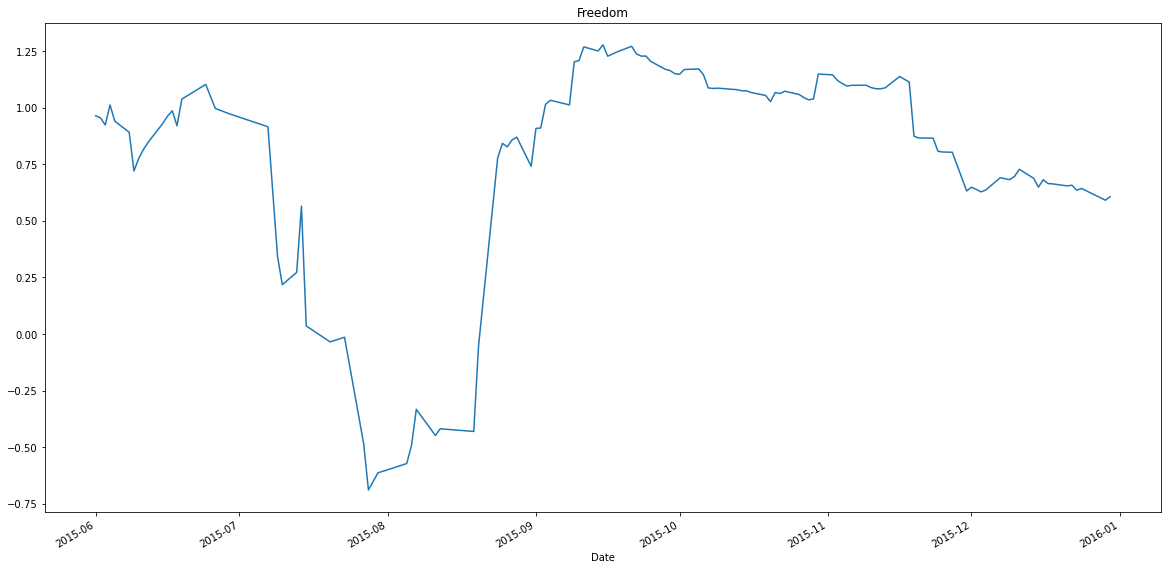

In [48]:
# Calculate and plot Beta
freedom_cov=final_return_df['Freedom'].rolling(window=60).cov(final_return_df['S&P TSX 60'])
freedom_var=final_return_df['S&P TSX 60'].rolling(window=60).var()
freedom_beta=freedom_cov/freedom_var
freedom_beta.plot(title='Freedom',figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualzied Sharpe Ratios
freedom_sharpe=(final_return_df.mean()*252)/(final_return_df.std()*np.sqrt(252))
freedom_sharpe.sort_values(ascending=False)

Algo 1                         2.721438
Freedom                        1.694769
TIGER GLOBAL MANAGEMENT LLC    0.579039
BERKSHIRE HATHAWAY INC         0.459257
SOROS FUND MANAGEMENT LLC      0.281624
PAULSON & CO.INC.              0.115443
Algo 2                        -0.144061
S&P TSX 60                    -1.168968
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

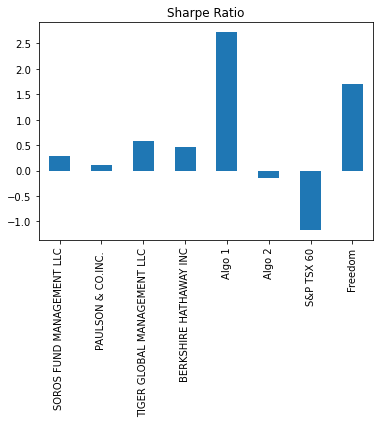

In [50]:
# Visualize the sharpe ratios as a bar plot
freedom_sharpe.plot(kind="bar",title='Sharpe Ratio')

### How does your portfolio do?

Write your answer here!

Based on the 21 day standard deviation, as you can see the second quarter 'Freedom' was doing much better than the other portfolios (Whale returns, Algorithmic retruns,and the S&P TSX 60). As we approach the third and fourth quarter 'Freedom' is on par with the other portfolios. Looking at the Sharpe Ratio Bar Graph other than 'Algo 1', 'Freedom' fares much better than the other portfolios. I would say that 'Freedom' as a whole does pretty well in comparison to the other portfolios. 